In [1]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/Student_academic.csv')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:

df.shape

(4424, 35)

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
print(df['Application mode'].value_counts())
print(df['Target'].value_counts())
print(df['Nacionality'].value_counts())
print(df.value_counts('Educational special needs'))
print(df.value_counts('Application mode'))
print(df.info())

1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
1     4314
14      38
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: Nacionality, dtype: int64
Educational special needs
0    4373
1      51
dtype: int64
Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
10       1
11       1
18       1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                   

 no null values found

In [7]:

total = df.isnull().sum().sort_values(ascending=False)
print(total)

Marital status                                    0
Curricular units 2nd sem (enrolled)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (evaluations)            0
International                                     0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Curricular units 1st sem (credited)               0
Age at enrollment                                 0
Application mode                                  0
Father's qua

converting obj to int

In [8]:
labelencoder=LabelEncoder()
df['Target']=labelencoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


in the above data we can see that target got converted into numeric value
where 0= dropout, 1= enrolled and 2 = graduated

In [9]:


df.Target.unique()

array([0, 2, 1])

In [10]:
df.groupby('Target').agg(['mean', 'median'])

Marital status        Application mode        Application order         \
                 mean median             mean median              mean median   
Target                                                                          
0            1.261084    1.0         8.342013    9.0          1.593244    1.0   
1            1.152393    1.0         7.238035    8.0          1.625945    1.0   
2            1.134903    1.0         5.824808    4.0          1.851064    1.0   

          Course        Daytime/evening attendance         ...  \
            mean median                       mean median  ...   
Target                                                     ...   
0       9.898663   10.0                   0.854328    1.0  ...   
1       9.732997    9.0                   0.905542    1.0  ...   
2       9.959258   11.0                   0.909009    1.0  ...   

       Curricular units 2nd sem (grade)         \
                                   mean median   
Target                                           
0                              5.899339    0.0   
1                             11.117364   12.0   
2                             12.697276   13.0   

       Curricular units 2nd sem (without evaluations)         \
                                                 mean median   
Target                                                         
0                                            0.237861    0.0   
1                                            0.187657    0.0   
2                                            0.080579    0.0   

       Unemployment rate        Inflation rate              GDP         
                    mean median           mean median      mean median  
Target                                                                  
0              11.616397   11.1       1.283955    1.4 -0.150859   0.32  
1              11.272544   11.1       1.211713    1.4  0.053287   0.32  
2              11.639339   11.1       1.197918    0.6  0.081833   0.79  

[3 rows x 68 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [12]:
df.drop(df.columns[[6, 7, 8,9,10,11]], axis=1, inplace=True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,0,0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,0,0,0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,0,0,0,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,0,0,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,0,0,1,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,0,0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,0,1,0,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,0,0,1,0,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,0,0,1,0,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Educational special needs                       4424 non-null   int64  
 7   Debtor                                          4424 non-null   int64  
 8   Tuition fees up to date                         4424 non-null   int64  
 9   Gender                                   

<Axes: >

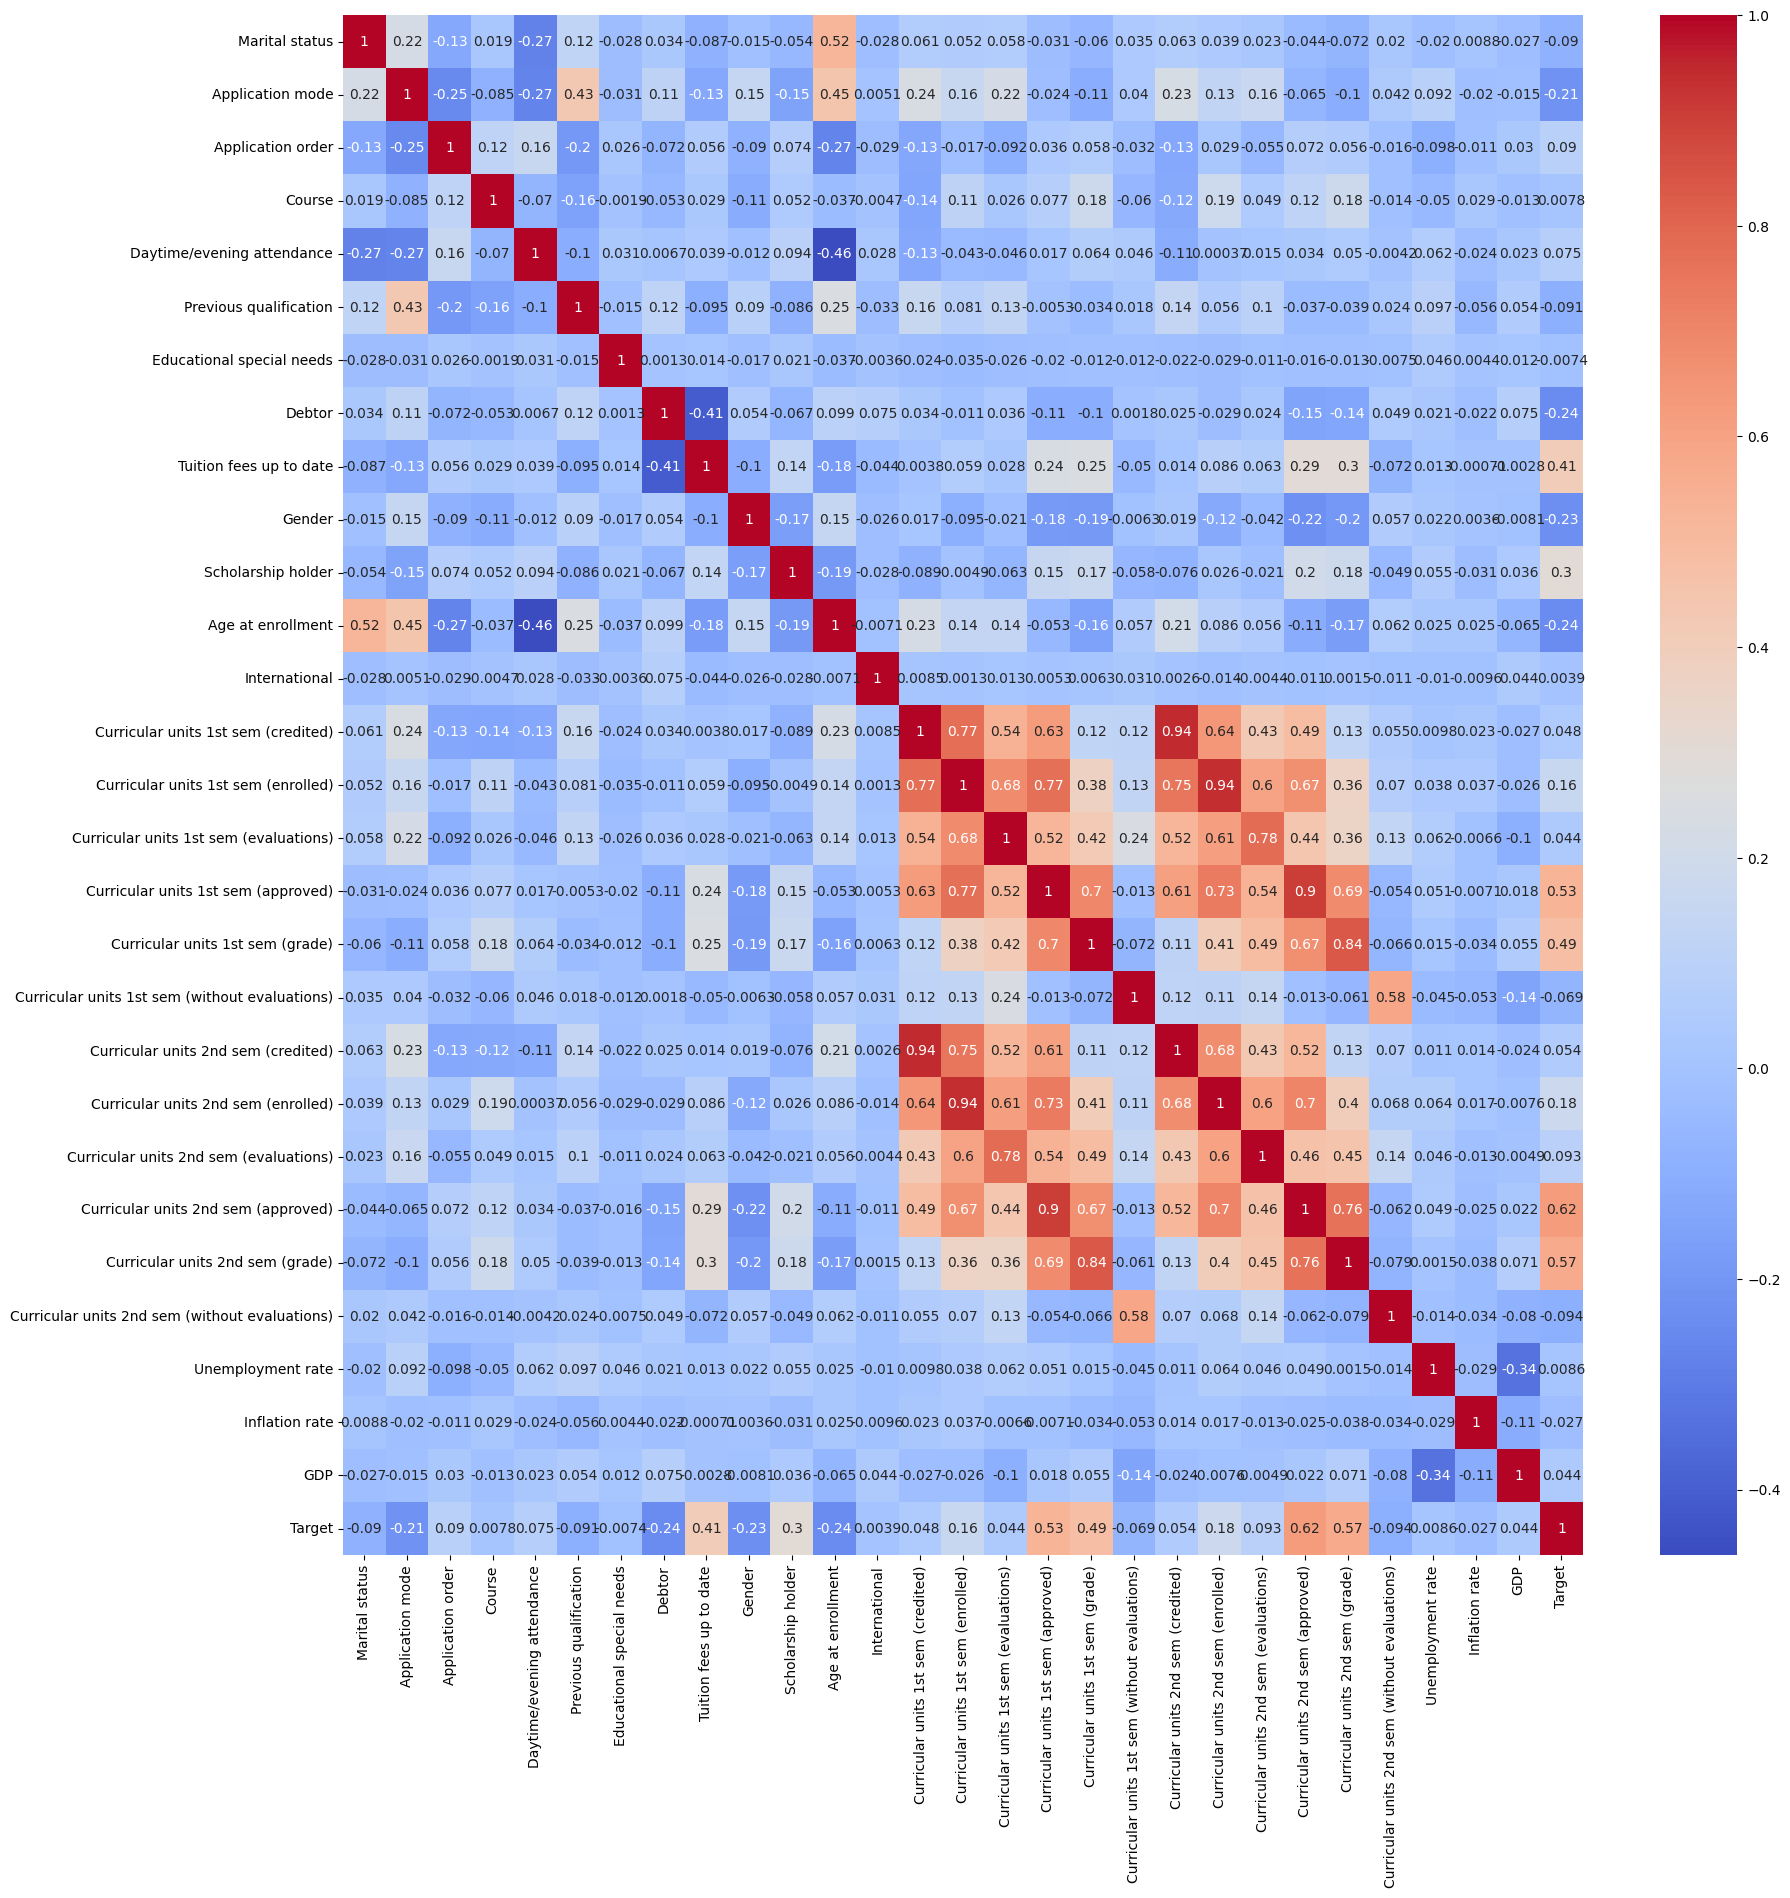

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<Axes: >

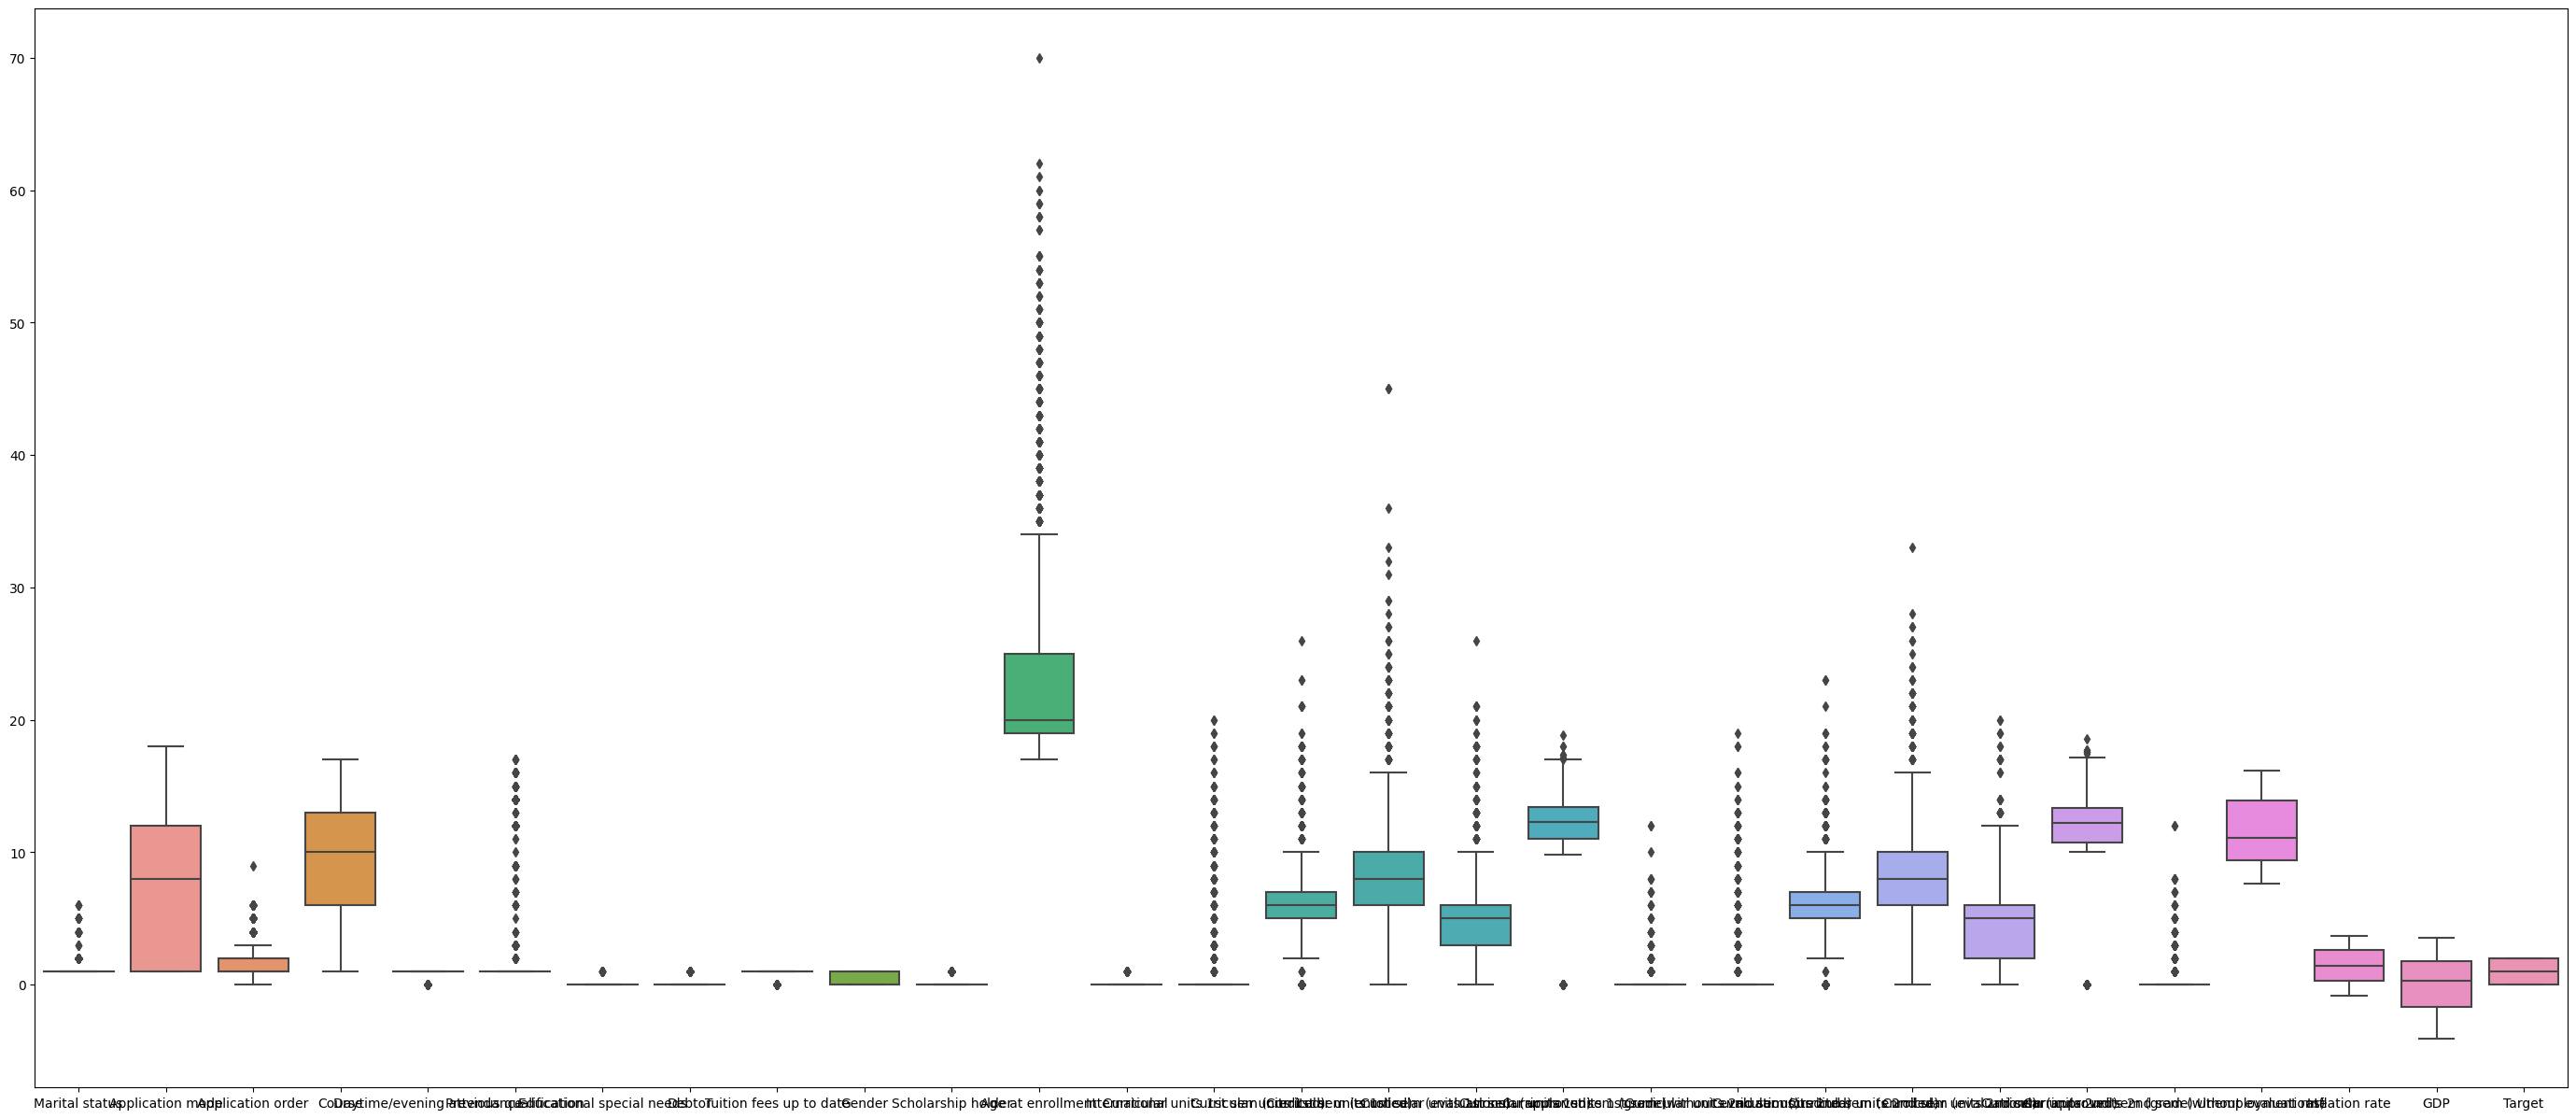

In [15]:
plt.figure(figsize=(35,15))
sns.boxplot(data=df)


<ipython-input-16-dd779e9c487b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


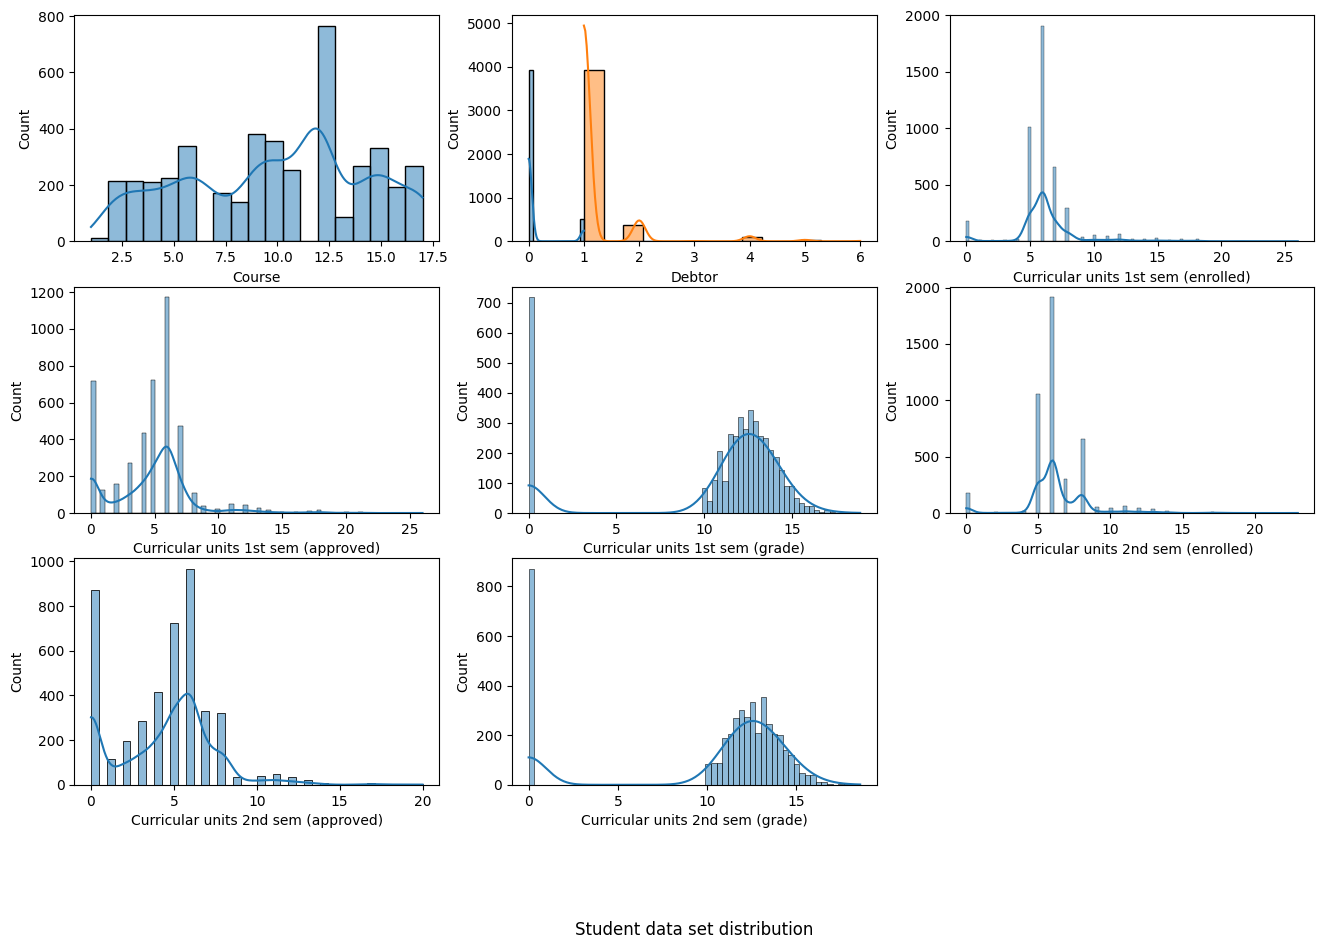

In [16]:
plt.figure(figsize=(16,10))
plt.title(f'plot of studes')
plt.subplot(3,3,1)
sns.histplot(df['Course'], kde=True)

plt.subplot(3,3,2)
sns.histplot(df['Debtor'], kde=True)
sns.histplot(df['Marital status'], kde=True)

plt.subplot(3,3,3)
#sns.histplot(df['placement_exam_marks'], kde=True)
sns.histplot(df['Curricular units 1st sem (enrolled)'], kde=True)

plt.subplot(3,3,4)
sns.histplot(df['Curricular units 1st sem (approved)'], kde=True)

plt.subplot(3,3,5)
sns.histplot(df['Curricular units 1st sem (grade)'], kde=True)

plt.subplot(3,3,6)
sns.histplot(df['Curricular units 2nd sem (enrolled)'], kde=True)
plt.subplot(3,3,7)
sns.histplot(df['Curricular units 2nd sem (approved)'], kde=True)

plt.subplot(3,3,8)
sns.histplot(df['Curricular units 2nd sem (grade)'], kde=True)


plt.title('Student data set distribution', y=-0.7)
plt.show()

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Marital status                                     0.000000
Application mode                                  11.000000
Application order                                  1.000000
Course                                             7.000000
Daytime/evening attendance                         0.000000
Previous qualification                             0.000000
Educational special needs                          0.000000
Debtor                                             0.000000
Tuition fees up to date                            0.000000
Gender                                             1.000000
Scholarship holder                                 0.000000
Age at enrollment                                  6.000000
International                                      0.000000
Curricular units 1st sem (credited)                0.000000
Curricular units 1st sem (enrolled)                2.000000
Curricular units 1st sem (evaluations)             4.000000
Curricular units 1st sem (approved)     

In [18]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(969, 29)

<Axes: >

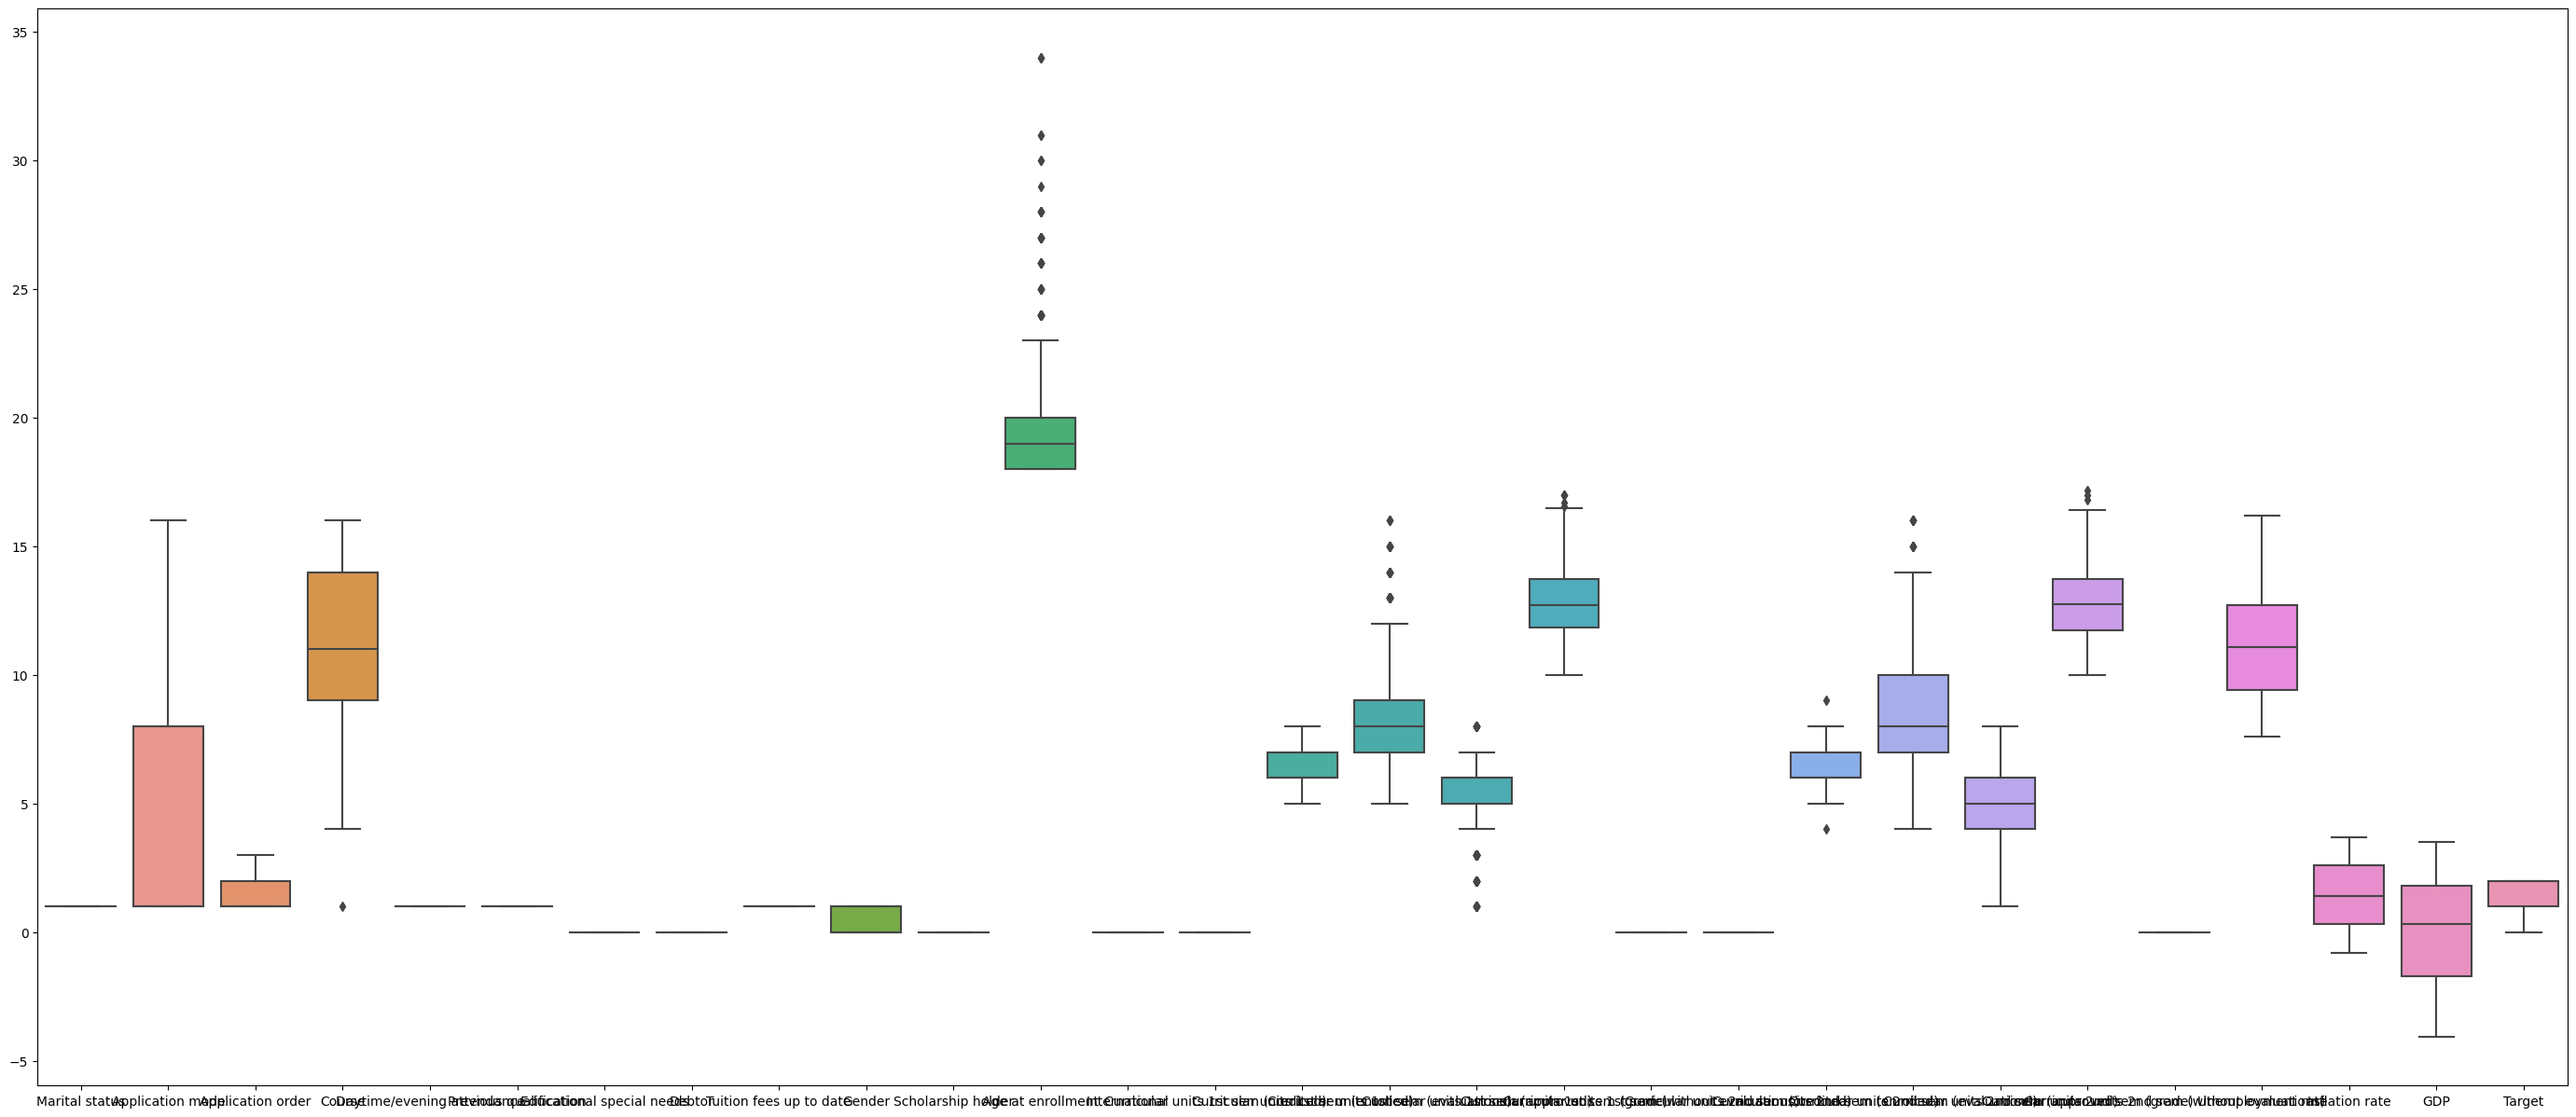

In [19]:
plt.figure(figsize=(35,15))
sns.boxplot(data=df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 3 to 4407
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  969 non-null    int64  
 1   Application mode                                969 non-null    int64  
 2   Application order                               969 non-null    int64  
 3   Course                                          969 non-null    int64  
 4   Daytime/evening attendance                      969 non-null    int64  
 5   Previous qualification                          969 non-null    int64  
 6   Educational special needs                       969 non-null    int64  
 7   Debtor                                          969 non-null    int64  
 8   Tuition fees up to date                         969 non-null    int64  
 9   Gender                                    

<ipython-input-21-dd779e9c487b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


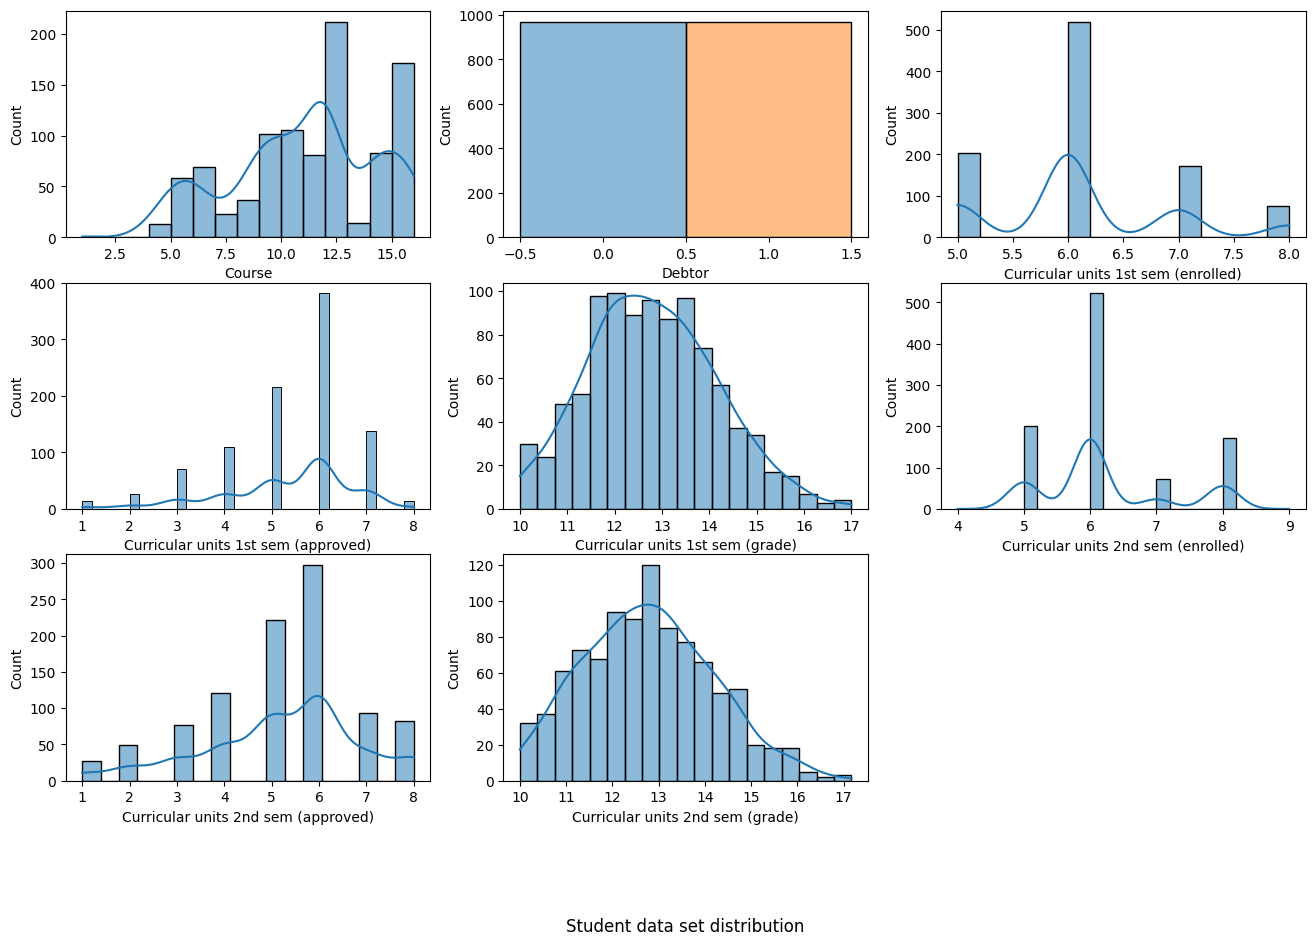

In [21]:
plt.figure(figsize=(16,10))
plt.title(f'plot of studes')
plt.subplot(3,3,1)
sns.histplot(df['Course'], kde=True)

plt.subplot(3,3,2)
sns.histplot(df['Debtor'], kde=True)
sns.histplot(df['Marital status'], kde=True)

plt.subplot(3,3,3)
#sns.histplot(df['placement_exam_marks'], kde=True)
sns.histplot(df['Curricular units 1st sem (enrolled)'], kde=True)

plt.subplot(3,3,4)
sns.histplot(df['Curricular units 1st sem (approved)'], kde=True)

plt.subplot(3,3,5)
sns.histplot(df['Curricular units 1st sem (grade)'], kde=True)

plt.subplot(3,3,6)
sns.histplot(df['Curricular units 2nd sem (enrolled)'], kde=True)
plt.subplot(3,3,7)
sns.histplot(df['Curricular units 2nd sem (approved)'], kde=True)

plt.subplot(3,3,8)
sns.histplot(df['Curricular units 2nd sem (grade)'], kde=True)


plt.title('Student data set distribution', y=-0.7)
plt.show()

# Machine learning

In [22]:
target='Target'
X=df.drop('Target',axis=1)
y=df['Target']
#Split the data into 80/20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [23]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.fit_transform(X_test)


In [24]:
pca = PCA()
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)

# Random Forest Algortihm  Accuracy and Matrix

In [25]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(principalComponents_train, y_train)
Y_prediction = random_forest.predict(principalComponents_train)
random_forest.score(principalComponents_train, y_train)
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(f'Accuracy of Random Forest Algorithm : {acc_random_forest}')

Accuracy of Random Forest Algorithm : 100.0


In [26]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 98,   0,   0],
       [  0, 199,   0],
       [  0,   0, 478]])

In [27]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        98
           1      1.000     1.000     1.000       199
           2      1.000     1.000     1.000       478

    accuracy                          1.000       775
   macro avg      1.000     1.000     1.000       775
weighted avg      1.000     1.000     1.000       775



# Gaussian Algortihm and matrix

In [28]:
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, y_train)
Y_pred = gaussian.predict(principalComponents_train)
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(f'Accuracy of Gaussian model : {acc_gaussian}')

Accuracy of Gaussian model : 71.74


In [29]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 36,  26,  36],
       [ 16,  93,  90],
       [  7,  44, 427]])

In [30]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.610     0.367     0.459        98
           1      0.571     0.467     0.514       199
           2      0.772     0.893     0.828       478

    accuracy                          0.717       775
   macro avg      0.651     0.576     0.600       775
weighted avg      0.700     0.717     0.701       775



# Logistic regression

In [31]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(f'Accuracy of Logistic Regression is : {acc_log}')

Accuracy of Logistic Regression is : 74.84


In [32]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 26,  43,  29],
       [ 14, 109,  76],
       [  3,  30, 445]])

In [33]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.605     0.265     0.369        98
           1      0.599     0.548     0.572       199
           2      0.809     0.931     0.866       478

    accuracy                          0.748       775
   macro avg      0.671     0.581     0.602       775
weighted avg      0.729     0.748     0.728       775



# Decision Tree

In [34]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,y_train)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(f'Accuracy of Decision tree is: {acc_dt}')

Accuracy of Decision tree is: 100.0


In [35]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 98,   0,   0],
       [  0, 199,   0],
       [  0,   0, 478]])

In [36]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        98
           1      1.000     1.000     1.000       199
           2      1.000     1.000     1.000       478

    accuracy                          1.000       775
   macro avg      1.000     1.000     1.000       775
weighted avg      1.000     1.000     1.000       775



# Linear SCV


In [37]:
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(acc_svc)

72.13


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 10,  52,  36],
       [  6,  96,  97],
       [  2,  23, 453]])

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.556     0.102     0.172        98
           1      0.561     0.482     0.519       199
           2      0.773     0.948     0.852       478

    accuracy                          0.721       775
   macro avg      0.630     0.511     0.514       775
weighted avg      0.691     0.721     0.680       775



# Roc curve

Text(0, 0.5, 'True Positive Rate (TPR)')

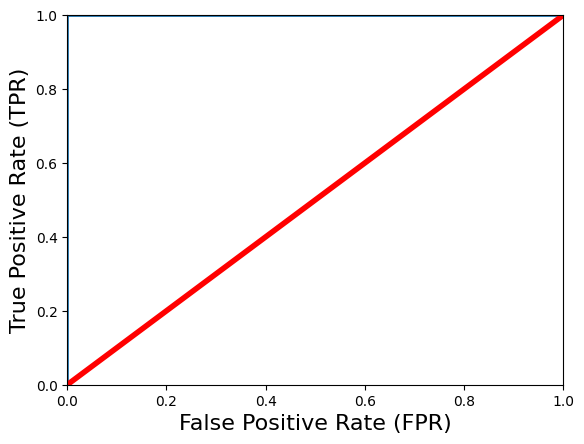

In [40]:
from sklearn.metrics import roc_curve
y_scores = random_forest.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)

Text(0, 0.5, 'True Positive Rate (TPR)')

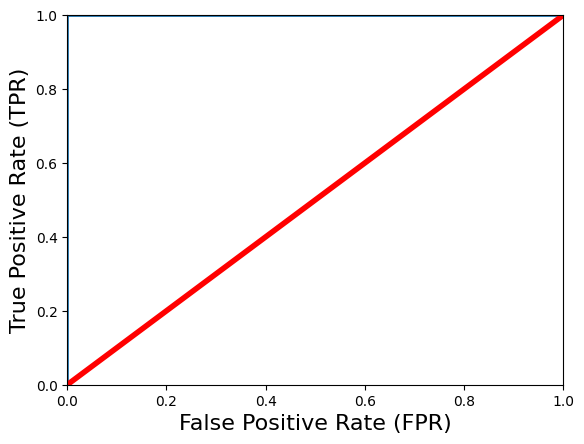

In [41]:
from sklearn.metrics import roc_curve
y_scores = decisiontree.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [52]:
y_true=predictions

In [53]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
Random Forest,100.00
Decision Tree,100.00
Logistic Regression,74.84
LinearSVC,72.13
gaussian,71.74
